# What is k-Nearest Neighbors
The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances. Training and prediction happens at the same time.

The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. For other types of data such as categorical or binary data, Hamming distance can be used.

In the case of regression problems, usually KNN will return the average value of the closest data points to the predicted data entry. In the case of classification it will be the most voted class.

In [11]:
import csv
import random
import math
import operator
import pandas as pd
import seaborn as sns

df = pd.read_csv("color.csv")
df = df.sample(frac=1) # shuffle the data a bit

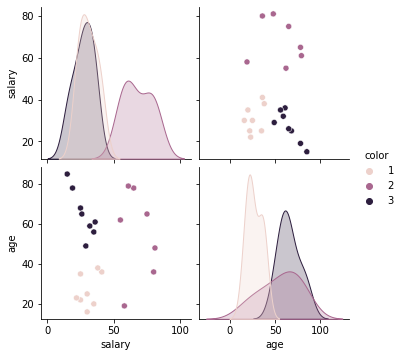

In [12]:
sns.pairplot(df, hue = "color")

# Similarity


In [6]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((float(instance1[x]) - float(instance2[x])), 2)
	return math.sqrt(distance)

Get the nereast neighbors using the distance function

In [7]:
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

Next task is to devise a predicted response based on each neighbor vote for their class attribute, and take the majority vote as the prediction.

In [8]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

Evaluation

In [9]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0
	

Run the algorithm

In [19]:
def main():
  # prepare data
  trainingSet=df.values.tolist()[:18]
  testSet=df.values.tolist()[19:]
  
  print ('Train set: ' + repr(len(trainingSet)))
  print ('Test set: ' + repr(len(testSet)))

  # generate predictions
  predictions=[]
  k = 3
  for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
  accuracy = getAccuracy(testSet, predictions)
  print('Accuracy: ' + repr(accuracy) + '%')
	
main()

Train set: 18
Test set: 4
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=1, actual=1
> predicted=1, actual=1
Accuracy: 100.0%
